In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-40-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Mon Jan 25 2021 15:20:16CET



## Load of the data

In [3]:
regen_data = True 
# If we keep it as false, it's going to just load the data. If true it's going to regenerate the data again 

In [4]:
if regen_data:
    from process import load_generate_data
    from process import savedata
    regr_data, class_data = load_generate_data(0.1, 5)
    savedata(regr_data, "regression_data-2.csv")

Reading file 1, progress 20.0%
Reading file 2, progress 40.0%
Reading file 3, progress 60.0%
Reading file 4, progress 80.0%


In [5]:
if not regen_data:
    from process import loaddata
    regr_data = loaddata("regression_data-2.csv")

In [6]:
np.random.shuffle(regr_data)
y = regr_data[:,-3:]
x = regr_data[:,:5]

In [7]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 2169 
Valuation sample: 723


In [8]:
x.shape

(2892, 5)

In [9]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [11]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (6, activation = "sigmoid" , input_shape = x.shape))
    model.add(layers.Dropout(0.3))
    model.add (layers.Dense (8, activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [12]:
model = build_model()
history = model.fit ( x_train, y_train, epochs = 100, batch_size = 2032, validation_data = (x_val, y_val) )
model.save("regr.h5")

Epoch 1/100
2/2 [==============================] - 1s 555ms/step - loss: 0.2981 - mae: 0.3656 - val_loss: 0.1398 - val_mae: 0.2793
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 0.2476 - mae: 0.3302 - val_loss: 0.1234 - val_mae: 0.2612
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 0.2314 - mae: 0.3202 - val_loss: 0.1113 - val_mae: 0.2473
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 0.2169 - mae: 0.3091 - val_loss: 0.1013 - val_mae: 0.2355
Epoch 5/100
2/2 [==============================] - 0s 30ms/step - loss: 0.1967 - mae: 0.2930 - val_loss: 0.0938 - val_mae: 0.2270
Epoch 6/100
2/2 [==============================] - 0s 31ms/step - loss: 0.1905 - mae: 0.2885 - val_loss: 0.0859 - val_mae: 0.2172
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 0.1726 - mae: 0.2758 - val_loss: 0.0792 - val_mae: 0.2080
Epoch 8/100
2/2 [==============================] - 0s 31ms/step - loss: 0.1715 - mae: 0.2

Epoch 56/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0160 - mae: 0.0898 - val_loss: 3.4756e-04 - val_mae: 0.0128
Epoch 57/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0147 - mae: 0.0883 - val_loss: 4.5145e-04 - val_mae: 0.0141
Epoch 58/100
2/2 [==============================] - 0s 50ms/step - loss: 0.0145 - mae: 0.0861 - val_loss: 5.8611e-04 - val_mae: 0.0149
Epoch 59/100
2/2 [==============================] - 0s 42ms/step - loss: 0.0135 - mae: 0.0842 - val_loss: 6.7780e-04 - val_mae: 0.0170
Epoch 60/100
2/2 [==============================] - 0s 42ms/step - loss: 0.0130 - mae: 0.0821 - val_loss: 7.5894e-04 - val_mae: 0.0178
Epoch 61/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0123 - mae: 0.0805 - val_loss: 7.7383e-04 - val_mae: 0.0179
Epoch 62/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0128 - mae: 0.0802 - val_loss: 9.3421e-04 - val_mae: 0.0198
Epoch 63/100
2/2 [==============================] - 0s 

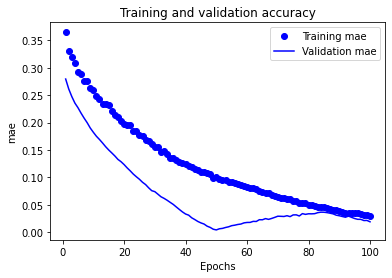

In [13]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

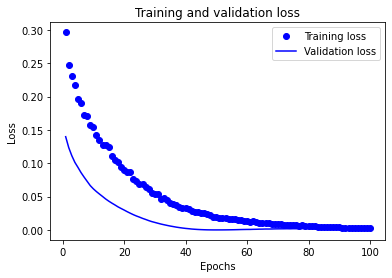

In [14]:
plt.clf()   # clear figure

loss = history.history['loss']
val_loss = history.history['val_loss']



plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## !! 
The dropout 0.2 seems to work better

In [15]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (6, activation = "sigmoid" , input_shape = x.shape))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (6, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (6, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [16]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 100, batch_size = 2032, validation_data = (x_val, y_val) )
model.save("regr.h5")

Epoch 1/100
2/2 [==============================] - 1s 150ms/step - loss: 0.2133 - mae: 0.3583 - val_loss: 0.0528 - val_mae: 0.2018
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 0.1734 - mae: 0.3205 - val_loss: 0.0398 - val_mae: 0.1714
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 0.1579 - mae: 0.3045 - val_loss: 0.0302 - val_mae: 0.1450
Epoch 4/100
2/2 [==============================] - 0s 38ms/step - loss: 0.1403 - mae: 0.2875 - val_loss: 0.0243 - val_mae: 0.1275
Epoch 5/100
2/2 [==============================] - 0s 38ms/step - loss: 0.1295 - mae: 0.2743 - val_loss: 0.0202 - val_mae: 0.1177
Epoch 6/100
2/2 [==============================] - 0s 37ms/step - loss: 0.1184 - mae: 0.2614 - val_loss: 0.0176 - val_mae: 0.1112
Epoch 7/100
2/2 [==============================] - 0s 37ms/step - loss: 0.1067 - mae: 0.2483 - val_loss: 0.0155 - val_mae: 0.1051
Epoch 8/100
2/2 [==============================] - 0s 41ms/step - loss: 0.0982 - mae: 0.2

2/2 [==============================] - 0s 36ms/step - loss: 0.0060 - mae: 0.0539 - val_loss: 0.0013 - val_mae: 0.0340
Epoch 56/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0057 - mae: 0.0521 - val_loss: 0.0011 - val_mae: 0.0312
Epoch 57/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0051 - mae: 0.0489 - val_loss: 0.0011 - val_mae: 0.0303
Epoch 58/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0048 - mae: 0.0471 - val_loss: 9.4636e-04 - val_mae: 0.0285
Epoch 59/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0047 - mae: 0.0459 - val_loss: 8.6116e-04 - val_mae: 0.0271
Epoch 60/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0041 - mae: 0.0430 - val_loss: 7.7474e-04 - val_mae: 0.0258
Epoch 61/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0040 - mae: 0.0421 - val_loss: 7.4114e-04 - val_mae: 0.0255
Epoch 62/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0036 

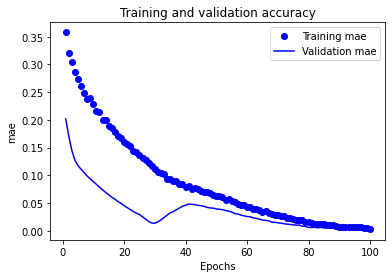

In [17]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

## Test spectrum

In [26]:
model_regr = keras.models.load_model('regr.h5')
model_class = keras.models.load_model('class.h5')

In [18]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step')
    plt.yscale("log")
    plt.show()

In [19]:
final_p = []
final_e = []

for regr_pair in regr_data:
    final_e.append(np.linalg.norm(regr_pair[10:13]))
    final_p.append(np.linalg.norm(regr_pair[13:16]))

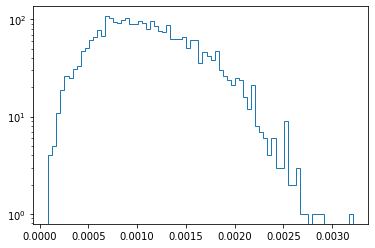

In [20]:
energy_spectrum(final_e, 75)

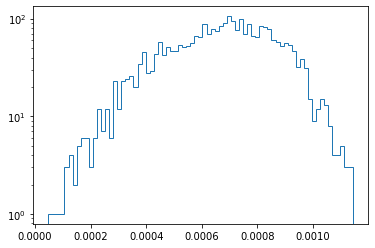

In [21]:
energy_spectrum(final_p, 75)

In [29]:
from tensorflow import keras 
photon_final_nn = []
threshold = 0.5
for i, x_ in enumerate(x[:200]):
    if i%100 == 0:
        print("{}%".format(i/len(x) * 100))
        x_ = np.array([x_])
        classification = model_class.predict(np.stack(x_))
        if classification >= threshold:
            regr_x = np.array([x_[0,:6]])
            regr_result = model_regr.predict(regr_x)
            photon_final_nn.append(np.linalg.norm(regr_result[0]))

0.0%


ValueError: in user code:

    /home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: expected axis -1 of input shape to have value 10 but received input with shape (None, 5)


In [ ]:
energy_spectrum(photon_final_nn, 75)

In [ ]:
photon_final_nn